In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
from Configuration import Config
import json
cfg = Config()

# Set the maximum number of columns displayed to None (no limit)
pd.set_option('display.max_columns', None)

In [ ]:
# Read all the folder names in the results directory

methods = os.listdir(cfg.results_loc)

print(methods)

In [18]:
# Combine all the results into a single dataframe
all_dataframes = []
for method in methods:
    tickers = os.listdir(os.path.join(cfg.results_loc, method))
    for ticker in tickers:
        # Read the results of each ticker
        results = pd.read_csv(os.path.join(cfg.results_loc, method, ticker, 'result.csv'))

        # Remove the 'Unnamed' column if it exists
        if 'Unnamed: 0' in results.columns:
            results = results.drop('Unnamed: 0', axis=1)

        # display(results)
        # Add the dataframe to the list
        all_dataframes.append(results)

# Combine all the dataframes into a single dataframe
combined_results_df = pd.concat(all_dataframes, ignore_index=True)

# Display the combined dataframe
display(combined_results_df)

,lrd,lrg,type,epochs,ticker,hid_g,hid_d,RMSE,MAE,SR_w scaled,PnL_w,Close-to-Open SR_w,Open-to-Close SR_w,Corr,Pos mn,Neg mn,narrow dist,narrow means dist,RMSE val,MAE val,PnL_w val,SR_w scaled val,Corr val,Pos mn val,Neg mn val
0,0.00001,0.00001,ForGAN-LSTM,100,AZO,8,8,0.012139,0.008401,-0.091379,-0.268521,-0.062136,-0.067063,-0.024629,1.000000,0.000000,False,False,0.011904,0.007416,3.289997,1.119347,0.071579,1.00000,0.00000
1,0.00001,0.00001,ForGAN-LSTM,100,AMZN,8,8,0.014244,0.011603,0.163495,0.900685,0.696242,-0.329431,-0.016163,1.000000,0.000000,False,False,0.012836,0.010441,3.104101,0.650664,0.014414,1.00000,0.00000
2,0.00001,0.00001,ForGAN-LSTM,100,EL,8,8,0.011845,0.007542,1.009774,2.278219,0.489054,0.819016,0.051478,0.992647,0.007353,False,False,0.010137,0.006187,1.460238,0.748281,-0.017475,0.99448,0.00552
3,0.00001,0.00001,ForGAN-LSTM,100,GS,8,8,0.011781,0.009862,-0.683592,-3.681368,-0.235693,-0.621615,0.037024,0.000000,1.000000,False,False,0.010475,0.009078,2.803904,0.640683,-0.035848,0.00000,1.00000


In [27]:
# Read all the json results from each ticker

cummulative_pnl = []
intraday_pnl = []
overnight_pnl = []
sample_distribution = []
means = []

for method in methods:
    tickers = os.listdir(os.path.join(cfg.results_loc, method))
    for ticker in tickers:
        # Read the results of each ticker
        with open(os.path.join(cfg.results_loc, method, ticker, 'PnLs.json')) as f:
            data = json.load(f)
            cummulative_pnl.append([method,ticker,data['cumPnL']])
            intraday_pnl.append([method,ticker,data['intradayCumPnL']])
            overnight_pnl.append([method,ticker,data['overnightCumPnL']])
            sample_distribution.append([method,ticker,data['sample_dist']])
            means.append([method,ticker,data['means']])

# Convert the lists to dataframes
cummulative_pnl_df = pd.DataFrame(cummulative_pnl, columns=['Method', 'Ticker', 'Cumulative PnL'])
intraday_pnl_df = pd.DataFrame(intraday_pnl, columns=['Method', 'Ticker', 'Intraday Cumulative PnL'])
overnight_pnl_df = pd.DataFrame(overnight_pnl, columns=['Method', 'Ticker', 'Overnight Cumulative PnL'])
sample_distribution_df = pd.DataFrame(sample_distribution, columns=['Method', 'Ticker', 'Sample Distribution'])
means_df = pd.DataFrame(means, columns=['Method', 'Ticker', 'Means'])

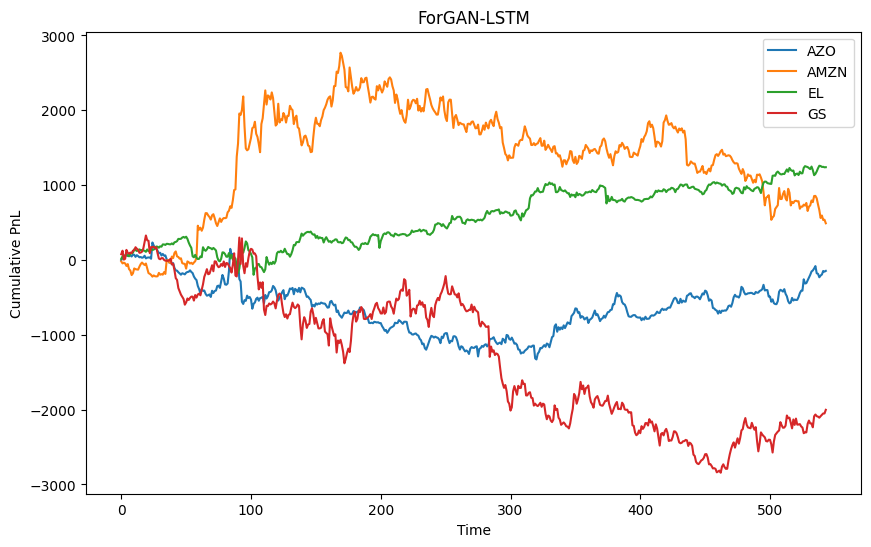

In [29]:
# Group the data by method
grouped = cummulative_pnl_df.groupby('Method')

# For each method, plot the cumulative PnL for all tickers
for name, group in grouped:
    plt.figure(figsize=(10, 6))
    for i in group.index:
        plt.plot(group.loc[i, 'Cumulative PnL'], label=group.loc[i, 'Ticker'])
    plt.title(name)
    plt.xlabel('Time')
    plt.ylabel('Cumulative PnL')
    plt.legend()
    plt.show()

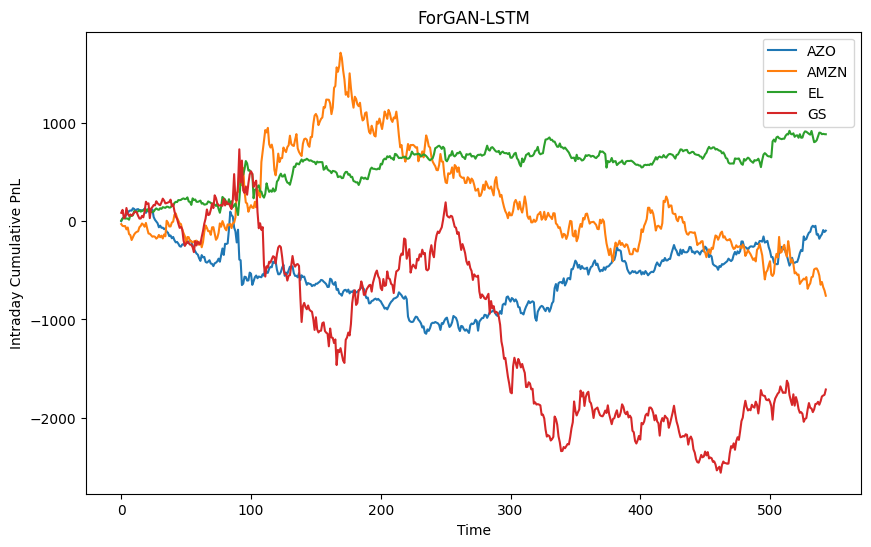

In [30]:
# Group the data by method
grouped = intraday_pnl_df.groupby('Method')

# For each method, plot the intraday cumulative PnL for all tickers
for name, group in grouped:
    plt.figure(figsize=(10, 6))
    for i in group.index:
        plt.plot(group.loc[i, 'Intraday Cumulative PnL'], label=group.loc[i, 'Ticker'])
    plt.title(name)
    plt.xlabel('Time')
    plt.ylabel('Intraday Cumulative PnL')
    plt.legend()
    plt.show()

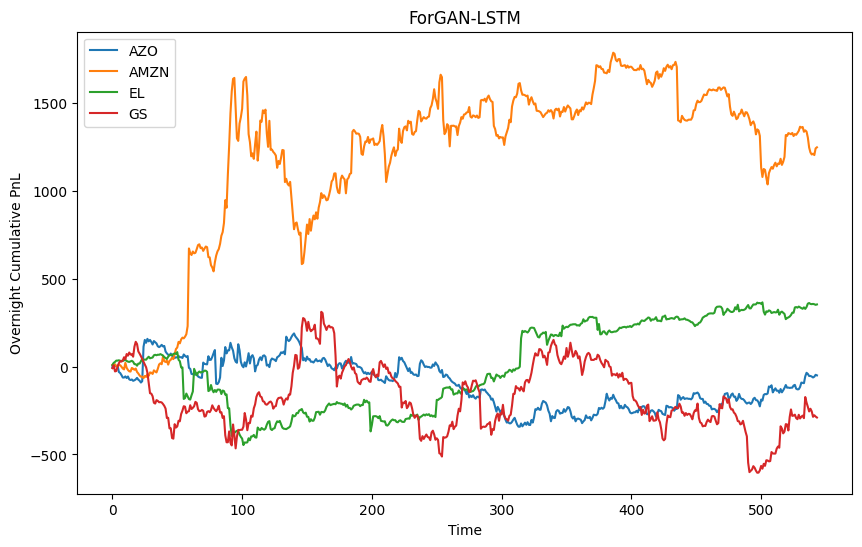

In [31]:
import matplotlib.pyplot as plt

# Group the data by method
grouped = overnight_pnl_df.groupby('Method')

# For each method, plot the overnight cumulative PnL for all tickers
for name, group in grouped:
    plt.figure(figsize=(10, 6))
    for i in group.index:
        plt.plot(group.loc[i, 'Overnight Cumulative PnL'], label=group.loc[i, 'Ticker'])
    plt.title(name)
    plt.xlabel('Time')
    plt.ylabel('Overnight Cumulative PnL')
    plt.legend()
    plt.show()

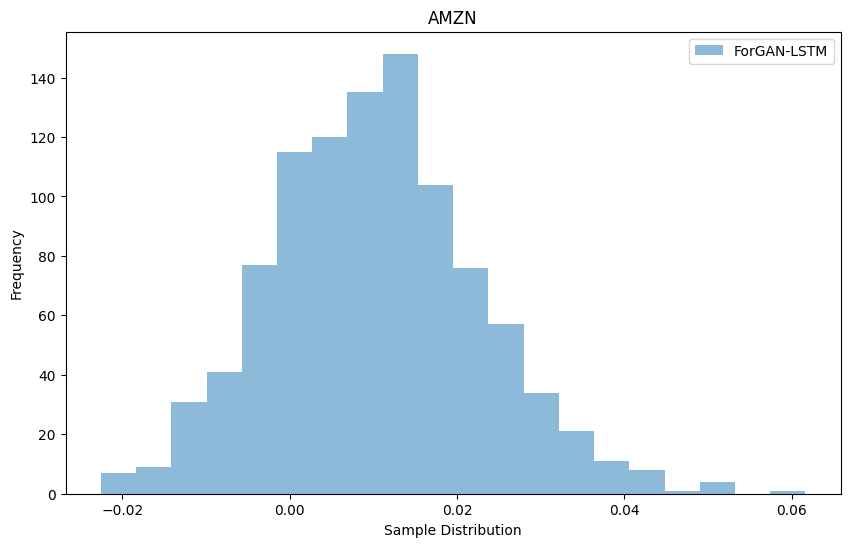

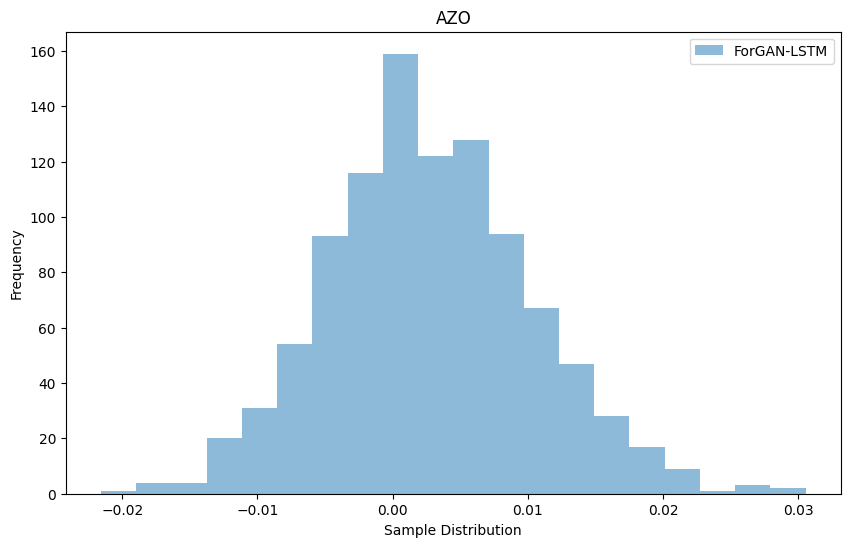

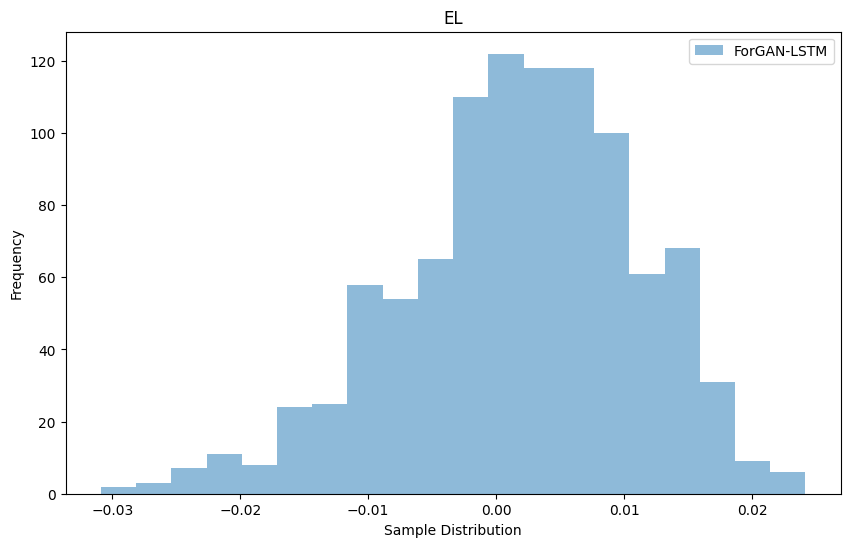

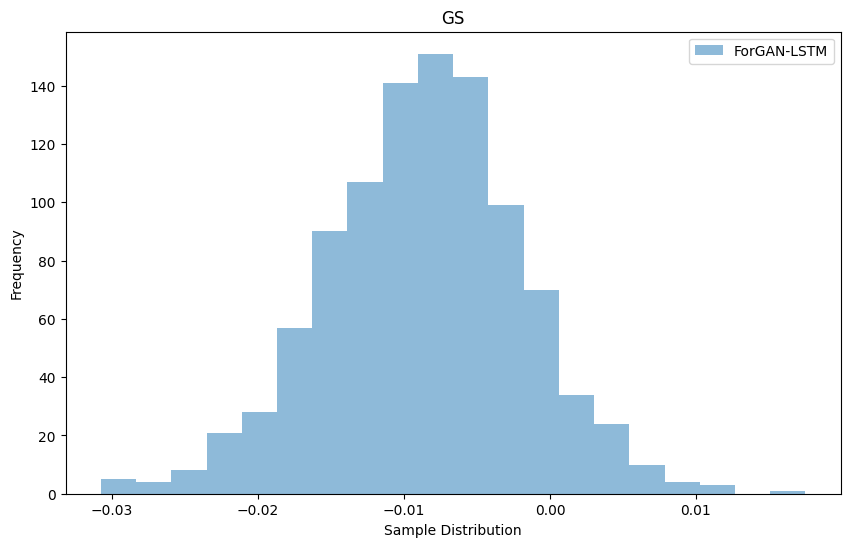

In [32]:
# Group the data by ticker
grouped = sample_distribution_df.groupby('Ticker')

# For each ticker, plot the sample distribution for all methods
for name, group in grouped:
    plt.figure(figsize=(10, 6))
    for i in group.index:
        plt.hist(group.loc[i, 'Sample Distribution'], label=group.loc[i, 'Method'], alpha=0.5, bins=20)
    plt.title(name)
    plt.xlabel('Sample Distribution')
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()